# Model Extension

Besides transfering, the PCNtoolkit can also be used to extend models. The difference in the outcome is that an extended model can be used on all sites that were in the reference set, plus the sites in the extension set. The transfered models only work on the data from the extend set. The key thing is that neither method requires access to the reference data; all that is needed is the estimated model parameters. 

The internal process is also quite different, but the syntax is almost the same. Just replace `transfer` with `extend` everywhere, and that's it. 

In [3]:
from pcntoolkit import load_fcon1000, HBR, NormativeModel
import arviz as az
import matplotlib.pyplot as plt
from pcntoolkit.util.plotter import plot_centiles_advanced


In [4]:
#  Use default likelihood; Normal, with bspline in mu and sigma, and a random intercept for mu
model = NormativeModel(HBR(), save_dir ="../out/models/extend_model")

# Load the FCON data
data = load_fcon1000()
# Drop all but the first three response vars
data=data.sel({"response_vars":data.response_vars[:3]})

# Select a few sites at random for extending
sites_for_extend = ["Berlin_Margulies", "Oxford"]
# Split by those sites
extend_data,reference_data  = data.batch_effects_split({"site":sites_for_extend},names=( "extend", "reference"))
# Split into train and test setss
reference_train, reference_test = reference_data.train_test_split((0.8, 0.2))
extend_train, extend_test = extend_data.train_test_split((0.8, 0.2))

Process: 47270 - 2025-11-19 16:19:02 - Removed 0 NANs
Process: 47270 - 2025-11-19 16:19:02 - Dataset "fcon1000" created.
    - 1078 observations
    - 1078 unique subjects
    - 1 covariates
    - 217 response variables
    - 2 batch effects:
    	sex (2)
	site (23)
    
Process: 47270 - 2025-11-19 16:19:02 - Dataset "extend" created.
    - 48 observations
    - 48 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (2)
    
Process: 47270 - 2025-11-19 16:19:02 - Dataset "reference" created.
    - 1030 observations
    - 1030 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (21)
    


In [5]:
# Fit a model
model.fit_predict(reference_train, reference_test)


Process: 47270 - 2025-11-19 16:19:06 - Fitting models on 3 response variables.
Process: 47270 - 2025-11-19 16:19:06 - Fitting model for lh_G&S_frontomargin_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,49,0.16,95
,2000,52,0.16,63
,2000,46,0.15,31
,2000,26,0.17,95


Process: 47270 - 2025-11-19 16:19:20 - Fitting model for lh_G&S_occipital_inf_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,50,0.15,63
,2000,140,0.15,31
,2000,70,0.15,31
,2000,46,0.16,15


Process: 47270 - 2025-11-19 16:19:32 - Fitting model for lh_G&S_paracentral_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,36,0.15,63
,2000,39,0.14,31
,2000,22,0.14,159
,2000,105,0.15,31


Sampling: []


Process: 47270 - 2025-11-19 16:19:45 - Making predictions on 3 response variables.
Process: 47270 - 2025-11-19 16:19:45 - Computing z-scores for 3 response variables.
Process: 47270 - 2025-11-19 16:19:45 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:19:45 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:19:46 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:19:46 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:19:46 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:19:48 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:19:50 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:19:52 - Computing log-probabilities for 3 response variables.
Process: 47270 - 2025-11-19 16:19:52 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 47270 - 2025-11-19 16:19:53 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 47270 - 2025-11-19 16:19:53 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:19:53 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 47270 - 2025-11-19 16:19:55 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 47270 - 2025-11-19 16:19:55 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:19:55 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:19:56 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:19:58 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:19:59 - Harmonizing data on 3 response variables.
Process: 47270 - 2025-11-19 16:19:59 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:00 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:01 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:02 - Saving model to:
	../out/models/extend_model.


Sampling: []


Process: 47270 - 2025-11-19 16:20:03 - Making predictions on 3 response variables.
Process: 47270 - 2025-11-19 16:20:03 - Computing z-scores for 3 response variables.
Process: 47270 - 2025-11-19 16:20:03 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:03 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:03 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:03 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:20:03 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:05 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:06 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:08 - Computing log-probabilities for 3 response variables.
Process: 47270 - 2025-11-19 16:20:08 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 47270 - 2025-11-19 16:20:08 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 47270 - 2025-11-19 16:20:08 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:09 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 47270 - 2025-11-19 16:20:10 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 47270 - 2025-11-19 16:20:10 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:20:10 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:11 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:13 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:14 - Harmonizing data on 3 response variables.
Process: 47270 - 2025-11-19 16:20:14 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:15 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:15 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:16 - Saving model to:
	../out/models/extend_model.


<xarray.NormData> Size: 83kB
Dimensions:            (observations: 206, response_vars: 3, covariates: 1,
                        batch_effect_dims: 2, centile: 5, statistic: 11)
Coordinates:
  * observations       (observations) int64 2kB 777 773 411 502 ... 198 823 487
  * response_vars      (response_vars) <U30 360B 'lh_G&S_frontomargin_thickne...
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U4 32B 'sex' 'site'
  * centile            (centile) float64 40B 0.05 0.25 0.5 0.75 0.95
  * statistic          (statistic) <U8 352B 'EXPV' 'MACE' ... 'SMSE' 'ShapiroW'
Data variables:
    subject_ids        (observations) object 2kB 'NewYork_a_sub29216' ... 'Ca...
    Y                  (observations, response_vars) float64 5kB 2.015 ... 2.628
    X                  (observations, covariates) float64 2kB 29.06 ... 18.0
    batch_effects      (observations, batch_effect_dims) <U17 28kB 'M' ... 'C...
    Z                  (observations, response_vars) float64 5kB -1.813 ... 2...
    centiles           (centile, observations, response_vars) float64 25kB 2....
    logp               (observations, response_vars) float64 5kB -2.35 ... -2...
    Yhat               (observations, response_vars) float64 5kB 2.288 ... 2.308
    statistics         (response_vars, statistic) float64 264B 0.2147 ... 0.9961
    Y_harmonized       (observations, response_vars) float64 5kB 2.059 ... 2.717
Attributes:
    real_ids:                       True
    is_scaled:                      False
    name:                           reference_test
    unique_batch_effects:           {np.str_('sex'): [np.str_('F'), np.str_('...
    batch_effect_counts:            defaultdict(<function NormData.register_b...
    covariate_ranges:               {np.str_('age'): {'mean': np.float64(28.1...
    batch_effect_covariate_ranges:  {np.str_('sex'): {np.str_('F'): {np.str_(...

Sampling: []


Process: 47270 - 2025-11-19 16:20:17 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 47270 - 2025-11-19 16:20:17 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:20:17 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:18 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:20 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:21 - Harmonizing data on 3 response variables.
Process: 47270 - 2025-11-19 16:20:21 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:22 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:20:23 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


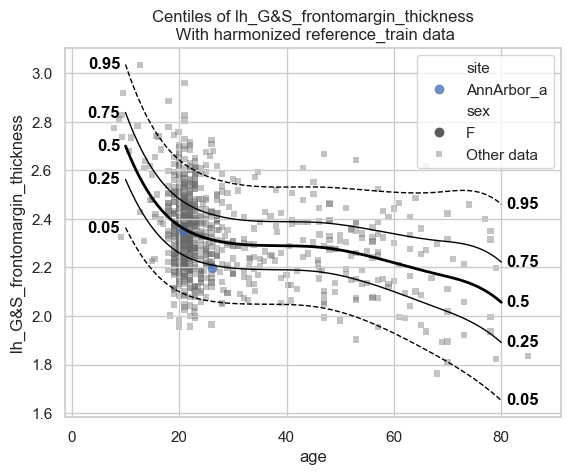

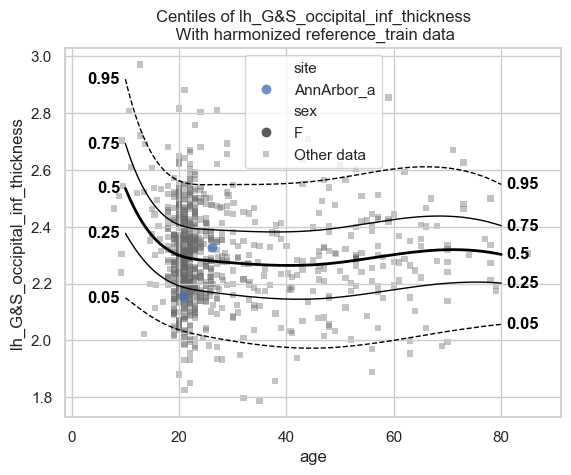

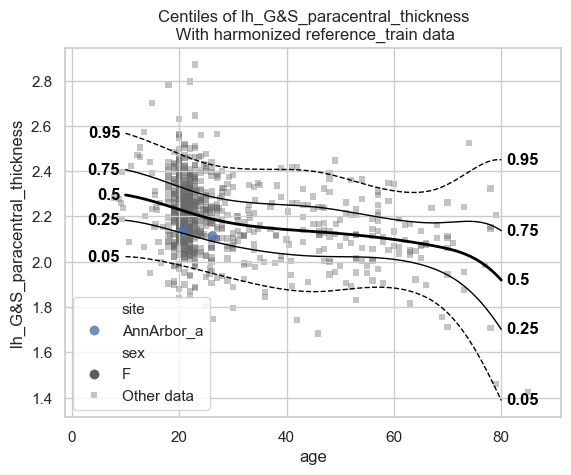

In [6]:
# Show the learned centiles
plot_centiles_advanced(model, scatter_data = reference_train, covariate_range=(10, 80), show_other_data=True)

In [7]:
# Load the model from disk (could also use the model that we just fitted, but this just shows that you can easily load and extend a model)
fitted_model = NormativeModel.load(model.save_dir)

In [8]:
# extend the model and make predictions 
extended_model = fitted_model.extend_predict(extend_train, extend_test)

Sampling: []


Process: 47270 - 2025-11-19 16:20:24 - Dataset "synthesized" created.
    - 1030 observations
    - 1030 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (21)
    
Process: 47270 - 2025-11-19 16:20:24 - Synthesizing data for 3 response variables.
Process: 47270 - 2025-11-19 16:20:24 - Synthesizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:25 - Synthesizing data for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:20:25 - Synthesizing data for lh_G&S_paracentral_thickness.
Process: 47270 - 2025-11-19 16:20:25 - Dataset "extend_train_+_synthesized" created.
    - 1068 observations
    - 1068 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (23)
    
Process: 47270 - 2025-11-19 16:20:25 - Fitting models on 3 response variables.
Process: 47270 - 2025-11-19 16:20:25 - Fitting model for lh_G&S_frontomargin_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,35,0.15,31
,2000,60,0.15,31
,2000,38,0.17,15
,2000,100,0.14,31


Process: 47270 - 2025-11-19 16:20:40 - Fitting model for lh_G&S_occipital_inf_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,34,0.17,63
,2000,46,0.17,31
,2000,34,0.15,63
,2000,112,0.17,63


Process: 47270 - 2025-11-19 16:20:53 - Fitting model for lh_G&S_paracentral_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,45,0.15,31
,2000,59,0.14,95
,2000,83,0.15,31
,2000,80,0.14,159


Sampling: []


Process: 47270 - 2025-11-19 16:21:09 - Making predictions on 3 response variables.
Process: 47270 - 2025-11-19 16:21:09 - Computing z-scores for 3 response variables.
Process: 47270 - 2025-11-19 16:21:09 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:09 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:09 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:10 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:21:10 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:12 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:14 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:16 - Computing log-probabilities for 3 response variables.
Process: 47270 - 2025-11-19 16:21:16 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 47270 - 2025-11-19 16:21:17 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 47270 - 2025-11-19 16:21:18 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:18 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 47270 - 2025-11-19 16:21:20 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 47270 - 2025-11-19 16:21:20 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:21:20 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:21 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:22 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:24 - Harmonizing data on 3 response variables.
Process: 47270 - 2025-11-19 16:21:24 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:25 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:26 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:27 - Saving model to:
	../out/models/extend_model_extend.


Sampling: []


Process: 47270 - 2025-11-19 16:21:27 - Making predictions on 3 response variables.
Process: 47270 - 2025-11-19 16:21:27 - Computing z-scores for 3 response variables.
Process: 47270 - 2025-11-19 16:21:27 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:27 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:28 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:28 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:21:28 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:29 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:30 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:32 - Computing log-probabilities for 3 response variables.
Process: 47270 - 2025-11-19 16:21:32 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 47270 - 2025-11-19 16:21:32 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 47270 - 2025-11-19 16:21:33 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 47270 - 2025-11-19 16:21:33 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 47270 - 2025-11-19 16:21:34 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 47270 - 2025-11-19 16:21:34 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:21:34 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:35 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:37 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:38 - Harmonizing data on 3 response variables.
Process: 47270 - 2025-11-19 16:21:38 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:39 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:39 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Sampling: []


Process: 47270 - 2025-11-19 16:21:40 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 47270 - 2025-11-19 16:21:40 - Computing centiles for 3 response variables.
Process: 47270 - 2025-11-19 16:21:40 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:42 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:43 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:45 - Harmonizing data on 3 response variables.
Process: 47270 - 2025-11-19 16:21:45 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:45 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 47270 - 2025-11-19 16:21:46 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


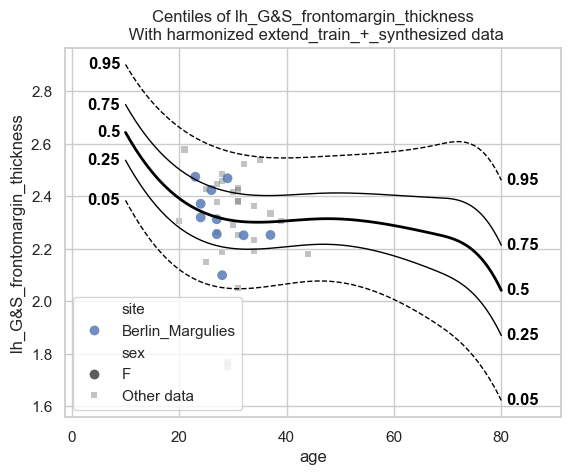

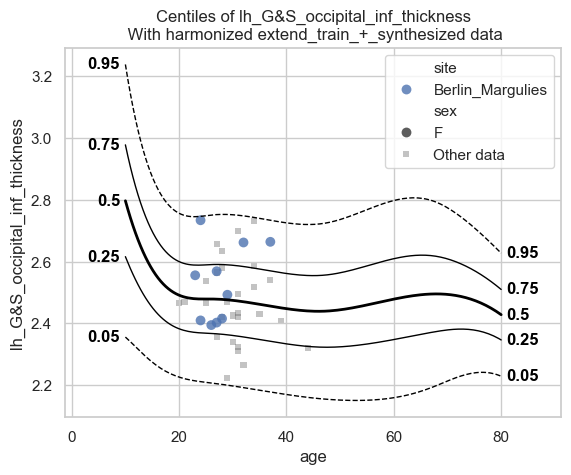

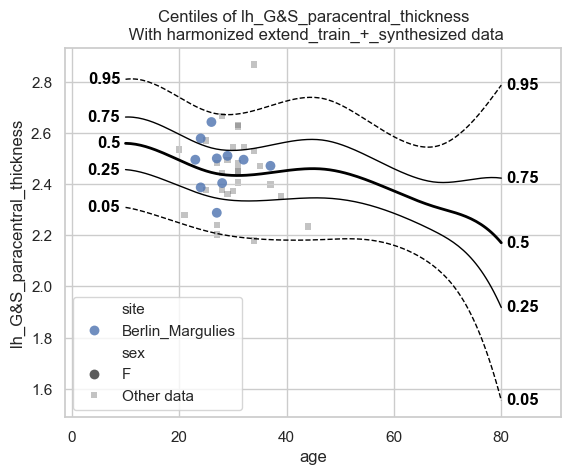

In [9]:
plot_centiles_advanced(extended_model, scatter_data = extend_train, covariate_range=(10, 80), show_other_data=True)

Here we again see that the model is quite capable of making reasonable predictions for data that falls outside the observed age range.
